In [1]:
import math
import cifar_models
import torch
from torchvision.models import resnet18
from pathlib import Path
from torchvision.datasets import CIFAR10
import torchvision.transforms as TF
from torchmetrics.classification import MulticlassAccuracy
import copy
import matplotlib.pyplot as plt
from eXNN.InnerNeuralViz import api

In [2]:
_normalize = TF.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
tfm = TF.Compose([TF.ToTensor(), _normalize])
test_ds = CIFAR10(root='./.cache', train=False, download=False, transform=tfm)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=128, shuffle=True)

In [3]:
data, labels = [], []
itr = iter(test_dl)
for i in range(10):
    batch = next(itr)
    data.append(batch[0])
    labels.append(batch[1])
data = torch.cat(data, dim=0)
labels = torch.cat(labels, dim=0)

In [4]:
model_fldr = Path('resnet18')
device = torch.device('cuda:0')

In [5]:
simple_model = resnet18(num_classes=10)
simple_model.load_state_dict(torch.load(model_fldr/"ResNet18.sd.pt",  map_location=device));
simple_model.eval();

In [6]:
layers = ['layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']

In [7]:
res = api.VisualizeNetSpace(simple_model, 'umap', data, layers, labels=labels, chunk_size=128)

Let's look at how well the trained model separated classes

Input data is not split at all

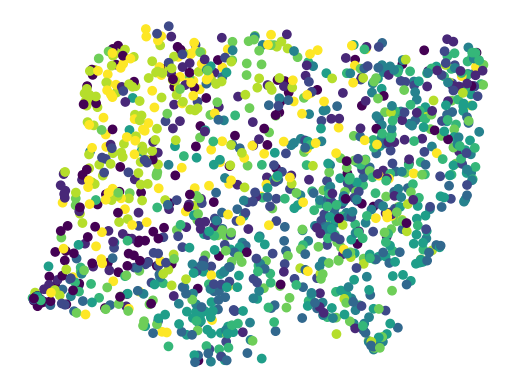

In [8]:
res['input']

After half of a network some structure emerges

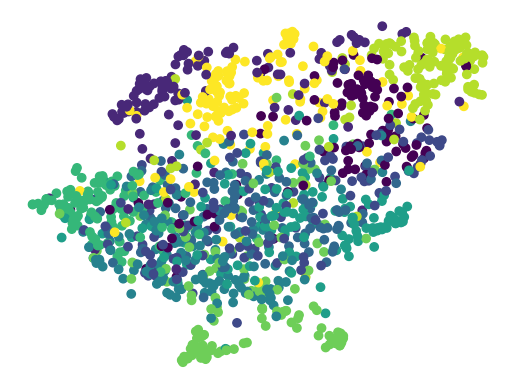

In [9]:
res['layer2']

Finally, after the last layer classes are well split

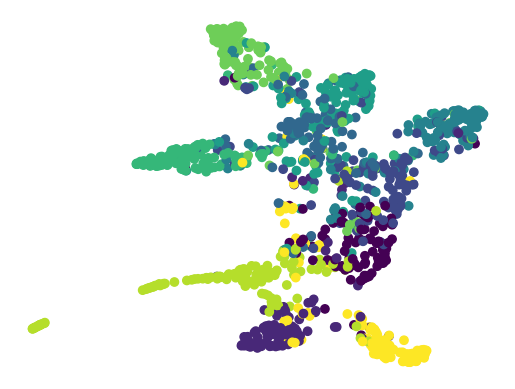

In [10]:
res['fc']